## 0) Importando Bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

## 1) Lendo o arquivo

#### Fonte Kaggle:https://www.kaggle.com/berkerisen/wind-turbine-scada-dataset

In [4]:
turbina = pd.read_csv('T1.csv')

In [5]:
turbina

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


In [6]:
display(turbina)

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


In [7]:
turbina.columns = ['Data/hora', 'ActivePower(kW)', 'WindSpeed(m/s)', 'Curva_Teórica(KWh)','Direção do Vento(°)']
del turbina['Direção do Vento(°)']

In [8]:
display(turbina)

,Data/hora,ActivePower(kW),WindSpeed(m/s),Curva_Teórica(KWh)
0,01 01 2018 00:00,380.047791,5.311336,416.328908
1,01 01 2018 00:10,453.769196,5.672167,519.917511
2,01 01 2018 00:20,306.376587,5.216037,390.900016
3,01 01 2018 00:30,419.645905,5.659674,516.127569
4,01 01 2018 00:40,380.650696,5.577941,491.702972
...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503


## 2) Plotando os dados em um gráfico - Real

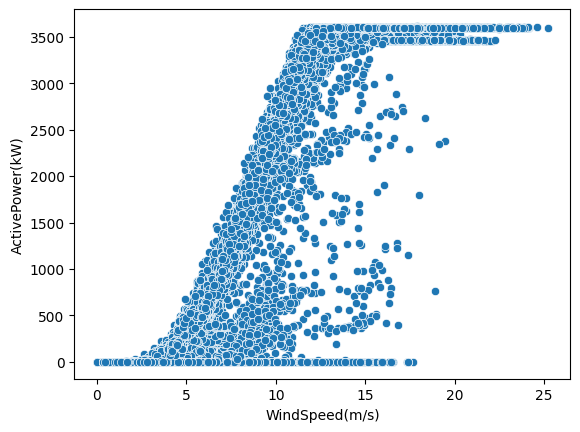

In [11]:
graf=sns.scatterplot(data=turbina, x='WindSpeed(m/s)', y='ActivePower(kW)')

## 3) Plotando os dados em um gráfico - Teórica

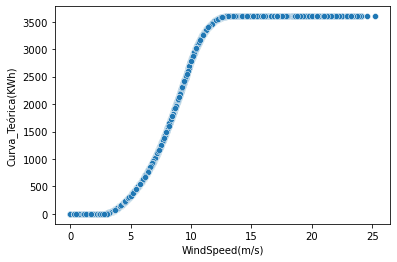

In [29]:
graf=sns.scatterplot(data=turbina, x='WindSpeed(m/s)', y='Curva_Teórica(KWh)')

Esse gráfico significa por exemplo que para 10 M/S, ele deveria estar gerando 2500 KWH de energia, 20 M/S deve estar gerando de energia 3500 KWH

## 4) Criando "limites aceitáveis"

In [13]:
#vel_vento = turbina['WindSpeed(m/s)'].tolist()
pot_real= turbina['ActivePower(kW)'].tolist()
pot_teorica = turbina['Curva_Teórica(KWh)'].tolist()
pot_max=[]
pot_min=[]
dentro_limite = []

for potencia in pot_teorica:
    pot_max.append(potencia*1.05)
    pot_min.append(potencia*0.95)

for p, potencia in enumerate(pot_real):
    if potencia>=pot_min[p] and potencia<=pot_max[p]:
        dentro_limite.append('Dentro')
    elif potencia==0:
        dentro_limite.append('Zero')
    else:
        dentro_limite.append('Fora')
    

#print(len(pot_max),len(pot_min))

print(dentro_limite.count('Dentro')/len(dentro_limite))



0.37286760340391845


Na primeira linha, colocamos dentro da variável POT_REAL uma LISTA.  Na segunda linha fizemos a mesma coisa com a coluna CURVA TEÓRICA, transformando ela em uma lista e colocando dentro da variável POT_TEORICA. 
Na terceira linha e quarta linha temos duas listas vazias de potencia máxima e mínima. 

Agora através do FOR, vamos percorrer a lista, com isso ele vai pegar para cada um dos valores que temos da lista, então com o POT_MAX.APPEND estamos adicionando um item naquela lista que estava vazia (POT_MAX) e vamos aumentar 5% que é *1.05.
No segundo FOR, criamos um limite superior e um limite inferior, os valores devem estar dentro do LIMITE que criamos.

Portanto, no primeiro IF queremos dizer que potencia é maior ou igual a potencia mínima e potencia menor ou igual a potencia maxima. 

A ultima linha de código quer que contemos dentro da lista DENTRO_LIMITE quantos são “DENTRO”  e com isso achamos o valor de apenas 37%.


## 5) Adicionando lista "dentro_limite" ao dataframe:

In [15]:
turbina['DentroLimite'] = dentro_limite
display(turbina)

,Data/hora,ActivePower(kW),WindSpeed(m/s),Curva_Teórica(KWh),DentroLimite
0,01 01 2018 00:00,380.047791,5.311336,416.328908,Fora
1,01 01 2018 00:10,453.769196,5.672167,519.917511,Fora
2,01 01 2018 00:20,306.376587,5.216037,390.900016,Fora
3,01 01 2018 00:30,419.645905,5.659674,516.127569,Fora
4,01 01 2018 00:40,380.650696,5.577941,491.702972,Fora
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,Fora
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,Fora
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,Fora
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,Dentro


## 6) Plotando novamente o gráfico:

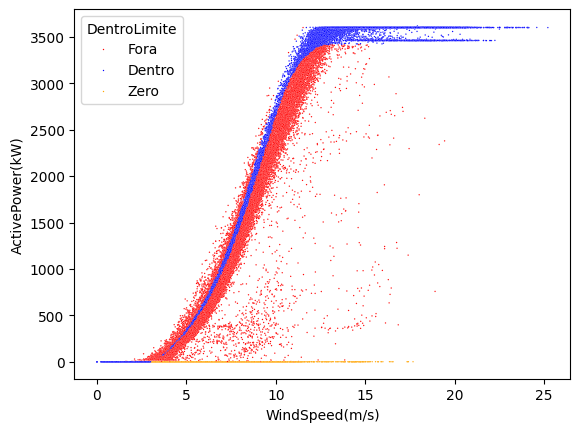

In [16]:
cores={'Dentro':'blue','Fora':'red','Zero':'orange'}
graf=sns.scatterplot(data=turbina, x='WindSpeed(m/s)', y='ActivePower(kW)',hue='DentroLimite', s=1,palette=cores)